<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Data_Preprocessing/Preprocessing_Geolife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import glob
import pandas as pd
import matplotlib.pyplot as plt
from drive.MyDrive.University.PiLab.Experiment.Codes import convertImage

In [9]:
trainFiles = glob.glob( '*plt' )
for f in sorted( trainFiles ):
    csv_file = pd.read_csv( f, names = [ 'lat', 'long', 'zero', 'alti', 'date_number', 'date_string', 'time'  ] )[6:]
    print( csv_file.shape )
    print( csv_file.head( 10 ) )
    print( '---------' )

    csv_file = csv_file.loc[:, lambda df: ['lat', 'long' ] ]
    csv_file.index = range( 0, len( csv_file ) )
    print( csv_file.shape )
    print( csv_file.head( 10 ) )
    print( '===================================' )

(908, 7)
          lat        long  zero alti   date_number date_string      time
6   39.984702  116.318417   0.0  492  39744.120185  2008-10-23  02:53:04
7   39.984683  116.318450   0.0  492  39744.120255  2008-10-23  02:53:10
8   39.984686  116.318417   0.0  492  39744.120313  2008-10-23  02:53:15
9   39.984688  116.318385   0.0  492  39744.120370  2008-10-23  02:53:20
10  39.984655  116.318263   0.0  492  39744.120428  2008-10-23  02:53:25
11  39.984611  116.318026   0.0  493  39744.120486  2008-10-23  02:53:30
12  39.984608  116.317761   0.0  493  39744.120544  2008-10-23  02:53:35
13  39.984563  116.317517   0.0  496  39744.120602  2008-10-23  02:53:40
14  39.984539  116.317294   0.0  500  39744.120660  2008-10-23  02:53:45
15  39.984606  116.317065   0.0  505  39744.120718  2008-10-23  02:53:50
---------
(908, 2)
         lat        long
0  39.984702  116.318417
1  39.984683  116.318450
2  39.984686  116.318417
3  39.984688  116.318385
4  39.984655  116.318263
5  39.984611  116.3

In [11]:
generator = convertImage.Map2ImageGenerator( 256, 256 )

<Figure size 432x288 with 0 Axes>

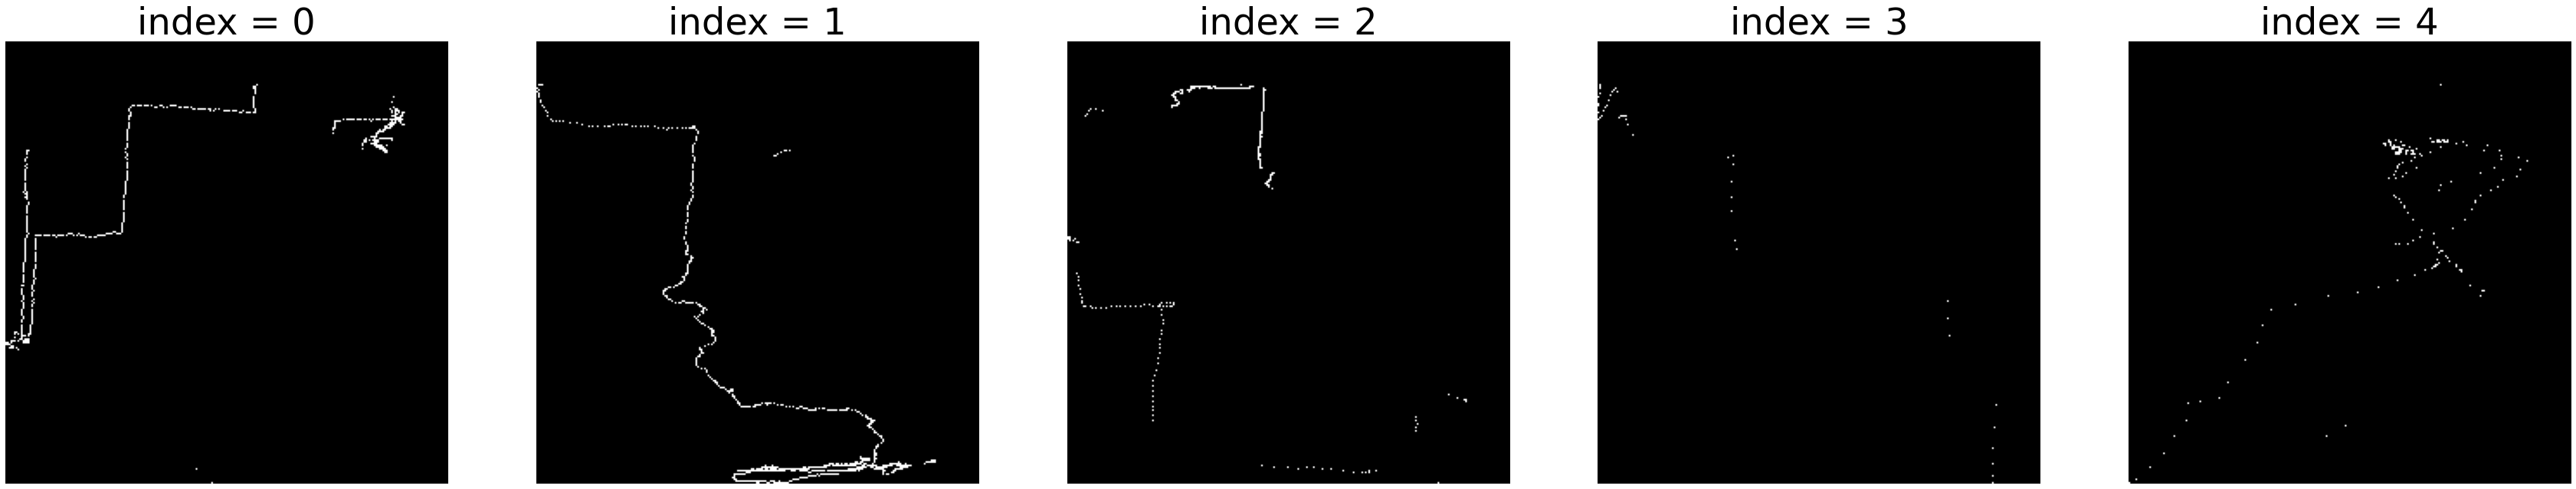

In [12]:
n = len( trainFiles )

plt.gray()
fig, ax = plt.subplots( 1, n, sharex = True, sharey = True, figsize = ( 60, 12 ) )
for i, file in enumerate(trainFiles):
    csv_file = pd.read_csv( file, names = [ 'lat', 'long', 'zero', 'alti', 'date_number', 'date_string', 'time'  ] )[6:]
    csv_file.index = range( 0, len( csv_file ) )
    resultImage = generator.ConvertImage( csv_file )

    ax[i].imshow( resultImage, )
    ax[i].set_title( f'index = {i}', fontsize = 48 )
    ax[i].axis( 'off' )

plt.savefig( 'result.png', dpi = 100 )
plt.show()